# KNN ALGORITHM

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
data = pd.read_csv( r"D:\Cellula Technologies ML_Internship\Task 2\first inten project.csv" )

In [9]:
data.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [10]:
data . head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [11]:
data . info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [12]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [13]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i)
        print(data[i].unique())
        print('\n')

    

Booking_ID
['INN00001' 'INN00002' 'INN00003' ... 'INN36284' 'INN36285' 'INN36286']


type of meal
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


room type
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']


market segment type
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


date of reservation
['10/2/2015' '11/6/2018' '2/28/2018' '5/20/2017' '4/11/2018' '9/13/2016'
 '10/15/2017' '12/26/2018' '7/6/2018' '10/18/2018' '9/11/2018' '4/30/2018'
 '11/26/2018' '11/20/2018' '10/20/2017' '6/15/2018' '10/5/2017'
 '8/10/2017' '10/30/2017' '10/4/2017' '11/25/2018' '3/20/2018'
 '10/13/2018' '5/22/2018' '4/28/2018' '9/21/2017' '5/19/2018' '11/6/2017'
 '9/17/2017' '9/19/2017' '11/13/2018' '12/7/2018' '1/9/2018' '10/7/2018'
 '4/27/2018' '6/19/2018' '10/17/2017' '11/19/2018' '7/30/2018' '11/1/2018'
 '6/21/2018' '4/10/2018' '6/27/2018' '11/18/2017' '12/29/2017'
 '11/20/2017' '4/6/2018' '12/29/2018' '5/30/2018' '4/22/2018' '5/1

In [14]:
data['booking status'].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [15]:
# one hot encoding
data['booking status'] = data['booking status'].map({'Not_Canceled':1, 'Canceled':0})


In [16]:
data['booking status'].value_counts()

booking status
1    24396
0    11889
Name: count, dtype: int64

In [17]:
data['market segment type'].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [18]:
# encoding
data['market segment type'] = data['market segment type'].map({'Online':0, 'Offline':1,'Corporate':2,'Complementary':3,'Aviation':4})

In [19]:
data['market segment type'].value_counts()

market segment type
0    23221
1    10531
2     2017
3      391
4      125
Name: count, dtype: int64

In [20]:
data['Booking_ID'].value_counts()

Booking_ID
INN00001    1
INN24194    1
INN24188    1
INN24189    1
INN24190    1
           ..
INN12090    1
INN12089    1
INN12088    1
INN12087    1
INN36286    1
Name: count, Length: 36285, dtype: int64

In [21]:
data['type of meal'].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [22]:
# encoding
data['type of meal'] = data['type of meal'].map({'Meal Plan 1':0, 'Not Selected':1,'Meal Plan 2':2, 'Meal Plan 3':3}) 

In [23]:
data['type of meal'].value_counts()

type of meal
0    27842
1     5132
2     3306
3        5
Name: count, dtype: int64

In [24]:
data['room type'].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [25]:
data['room type'] = data['room type'].map({'Room_Type 1':0, 'Room_Type 4':1,'Room_Type 6':2, 'Room_Type 2':3 , 'Room_Type 3':4, 'Room_Type 5':5, 'Room_Type 7':6})

In [26]:
data['room type'].value_counts()

room type
0    28138
1     6059
2      966
3      692
5      265
6      158
4        7
Name: count, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  int64  
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  int64  
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  int64  
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [28]:
# drop object columns
data.drop(['Booking_ID','date of reservation'], axis=1, inplace=True)

In [29]:
data . head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,0,0,0,224,1,0,0,0,88.00,0,1
1,1,0,1,3,1,0,0,5,0,0,0,0,106.68,1,1
2,2,1,1,3,0,0,0,1,0,0,0,0,50.00,0,0
3,1,0,0,2,0,0,0,211,0,0,0,0,100.00,1,0
4,1,0,1,2,1,0,0,48,0,0,0,0,77.00,0,0


In [30]:
data['booking status'].value_counts()

booking status
1    24396
0    11889
Name: count, dtype: int64

In [31]:
x = data.drop('booking status', axis=1)
y = data['booking status']

In [32]:
data . describe()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.324073,0.030977,0.340857,85.239851,0.447513,0.025630,0.023343,0.153369,103.421636,0.619733,0.672344
std,0.518813,0.402704,0.870590,1.410946,0.634123,0.173258,0.819377,85.938796,0.681489,0.158032,0.368281,1.753931,35.086469,0.786262,0.469365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,1.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [33]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)

In [34]:
from sklearn.cluster import KMeans

In [35]:
# Import Required Libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

c:\Users\Dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Dell\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dell\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Dell\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

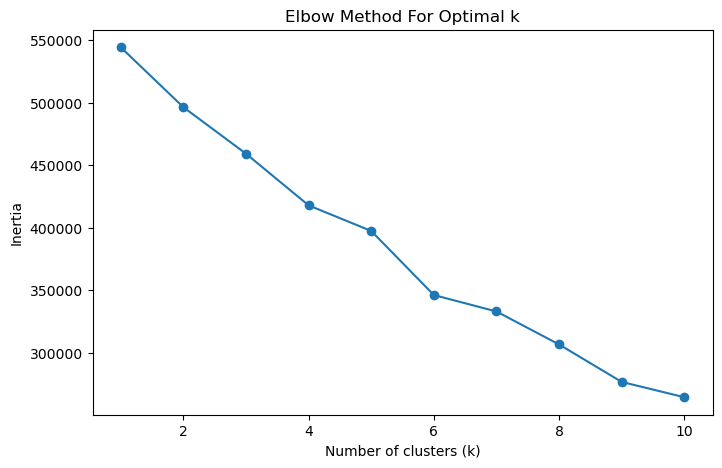

In [36]:
# Apply KMeans Clustering
inertia = []  # List to store the inertia values for different k

# Apply KMeans clustering with different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=6)

In [42]:
kmeans.fit(data)

KMeans(n_clusters=6)

In [43]:
kmeans.cluster_centers_

array([[ 3.64860936e-01, -8.67736222e-02,  1.42559573e-01,
         7.62269684e-02, -1.20961801e-01,  1.69304133e-01,
         1.16792093e-02, -3.29406936e-01, -5.94437340e-01,
        -1.62187005e-01, -6.33845019e-02, -8.74443125e-02,
         2.82925321e-01,  8.40937801e-01,  6.81325332e-01],
       [-1.31139062e-01,  3.62649324e+00,  8.03537128e-02,
         1.02071387e-01, -2.98387234e-01,  1.48133696e-01,
         3.12933114e+00, -2.25160592e-01, -3.37076746e-01,
        -1.53653075e-01, -6.33845019e-02, -8.66753903e-02,
         1.73064478e+00,  2.75243103e-01, -1.33733031e-01],
       [-1.20940883e+00, -2.29537197e-01, -4.39892618e-01,
        -6.29730758e-01, -4.31380621e-01,  6.69006950e-01,
        -2.01775437e-02, -8.38885196e-01,  2.15051236e+00,
         6.16572210e+00,  1.03105399e+00,  2.33119534e+00,
        -1.08922442e+00, -8.72702243e-02,  6.68049864e-01],
       [ 1.70408677e-01, -1.51203860e-01,  8.26938535e-02,
         1.30019361e-01,  1.59262121e-01, -1.39426151

In [44]:
kmeans.labels_

array([4, 0, 3, ..., 0, 0, 0])